In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pydataset import data
from env import get_db_url

### Use the ```iris``` database to answer the following quesitons:

In [17]:
url_iris = get_db_url('iris_db')
sql_iris = '''
SELECT species_name, sepal_length, sepal_width, petal_length, petal_width
FROM species
JOIN measurements USING(species_id)
'''
iris = pd.read_sql(sql_iris, url_iris)
iris.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


**1. What does the distribution of petal lengths look like?**

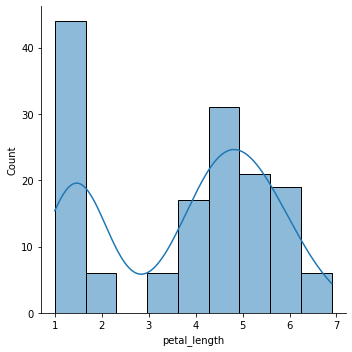

In [18]:
sns.displot(data = iris, x = 'petal_length', kde = True);

**2. Is there a correlation between petal length and petal width? Use http://guessthecorrelation.com/ as a hint to how we could visually determine if a correlation exists between two numeric columns.**

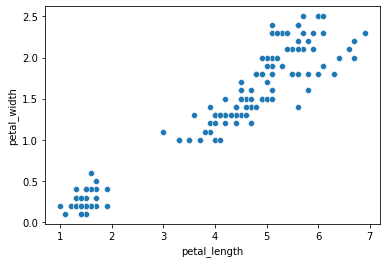

In [19]:
sns.scatterplot(data = iris, x = 'petal_length', y = 'petal_width');
# yes. positive correlation

In [20]:
#created a correlation matrix to confirm a positive correlation
pd.DataFrame(np.corrcoef(iris.petal_length, iris.petal_width), 
             index=['petal_length', 'petal_width'], columns=['petal_length', 'petal_width'])

,petal_length,petal_width
petal_length,1.000000,0.962865
petal_width,0.962865,1.000000


**3. Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.**

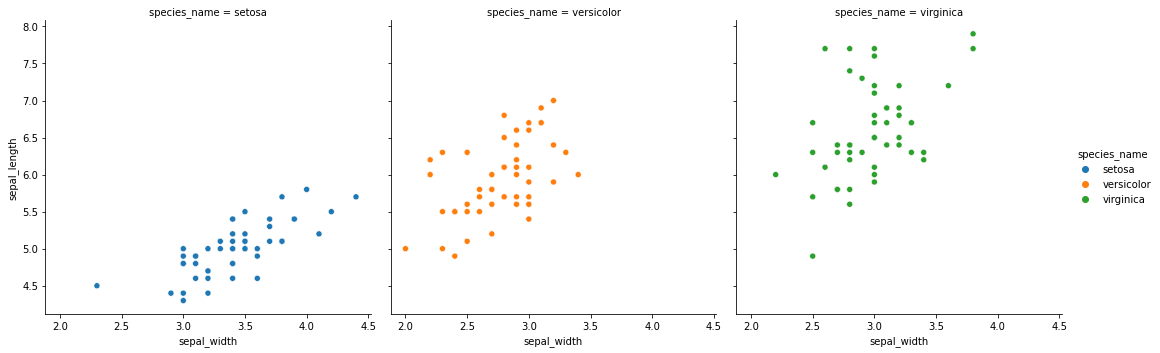

In [21]:
sns.relplot(data = iris, x = 'sepal_width',
            y = 'sepal_length',
            col = 'species_name',
            hue = 'species_name');

* *Setosa* width > 3.0, length < 6.0
* *Versicolor* width < 3.5, 5 < length < 7
* *Virginica*width is more spread, but the length mostly is > 5.5

The do overlap each other so, there is a pattern but it is hard to predict the species based on the sepal width and length

**4. Which features would be best used to predict species?**

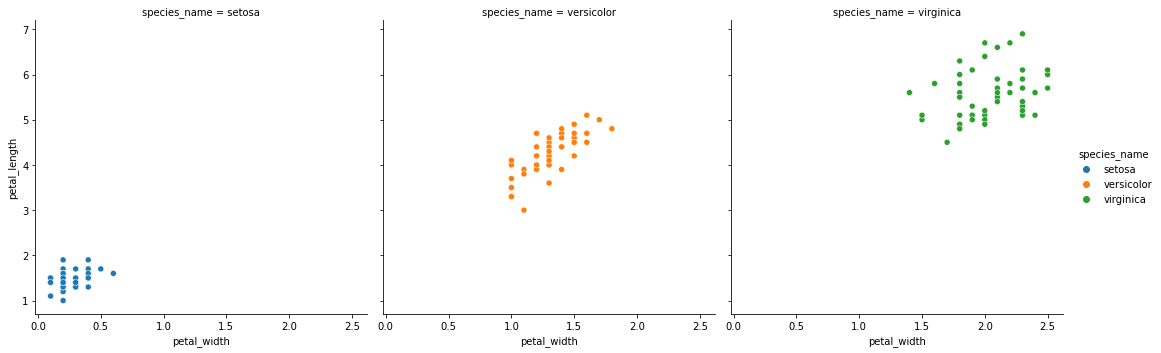

In [22]:
sns.relplot(data = iris, x = 'petal_width',
            y = 'petal_length',
            col = 'species_name',
            hue = 'species_name');

*Petal length and petal width definitely show better clustering that can be used to predict species*

### Part II

**1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?**

In [23]:
ans = sns.load_dataset('anscombe')
ans.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [25]:
ans.dataset.unique()

array(['I', 'II', 'III', 'IV'], dtype=object)

In [38]:
ans.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

In [39]:
#ans.pivot_table(index = 'dataset', values = [ans.x, ans.y], aggfunc = ['min', 'max', 'mean', 'median,''sum']).round(2)

* **Plot the x and y values from the anscombe data. Each dataset should be in a separate column.**

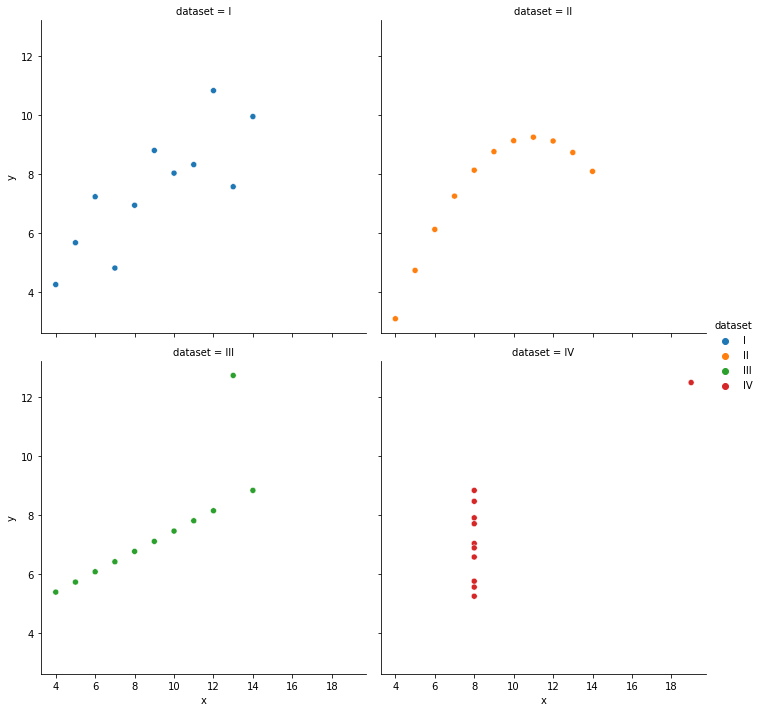

In [43]:
sns.relplot(data = ans, x = 'x',
            y = 'y',
            col = 'dataset',
            hue = 'dataset',
            col_wrap = 2);

**2. Load the ```InsectSprays``` dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.**

In [48]:
ins = data('InsectSprays')
ins.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


In [67]:
#data('InsectSprays', show_doc = True)

In [52]:
ins.spray.nunique()

6

<AxesSubplot:xlabel='count'>

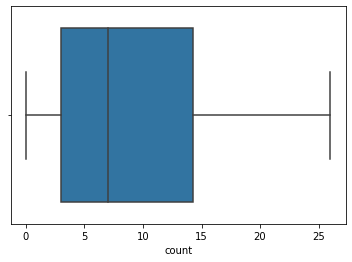

In [51]:
sns.boxplot(data = ins, x = 'count')

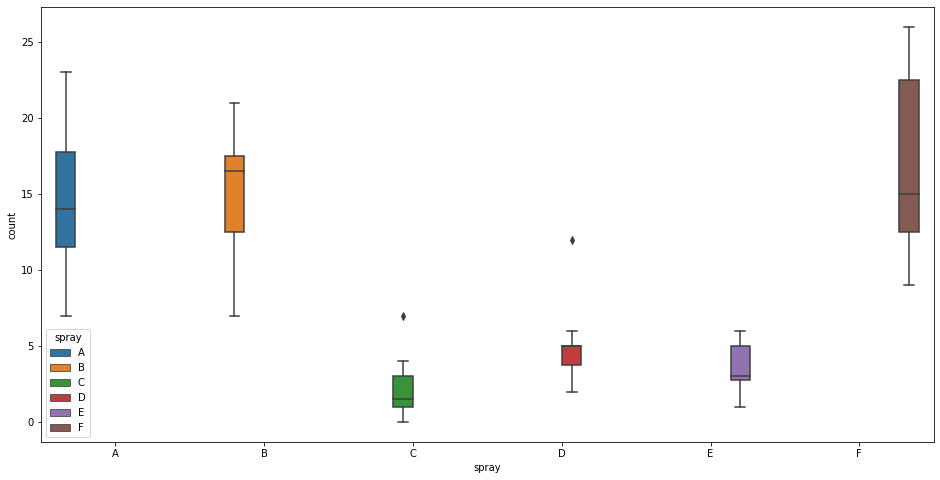

In [55]:
plt.figure(figsize = (16, 8))
sns.boxplot(data = ins, y = 'count', x = 'spray', hue = 'spray');

**3. Load the swiss dataset and read it's documentation. The swiss dataset is available from pydatset rather than seaborn. Create visualizations to answer the following questions:**

In [61]:
swiss = data('swiss')
swiss.head(1)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2


In [62]:
#data('swiss', show_doc = True)

In [68]:
#swiss.info()

* *Create an attribute named ```is_catholic``` that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)*

In [66]:
#swiss.Catholic >= 80.0

In [78]:
swiss['is_catholic'] = swiss.Catholic >= 80.0

In [85]:
swiss.head(1)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False


* Does whether or not a province is Catholic influence fertility?

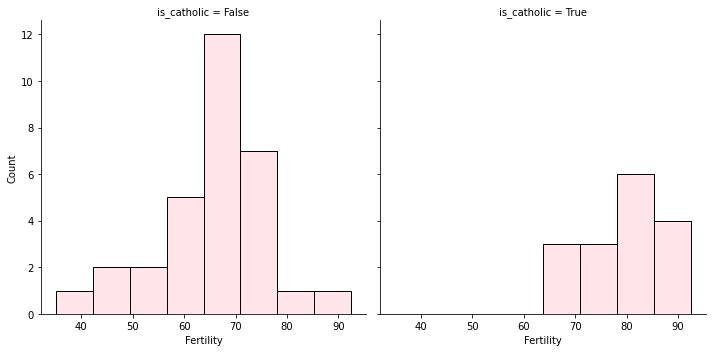

In [76]:
sns.displot(data = swiss, x = 'Fertility', col = 'is_catholic', color = 'pink', alpha = 0.4);

* What measure correlates most strongly with fertility?

In [88]:
swiss.describe()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
count,47.000000,47.000000,47.000000,47.000000,47.00000,47.000000
mean,70.142553,50.659574,16.489362,10.978723,41.14383,19.942553
std,12.491697,22.711218,7.977883,9.615407,41.70485,2.912697
min,35.000000,1.200000,3.000000,1.000000,2.15000,10.800000
25%,64.700000,35.900000,12.000000,6.000000,5.19500,18.150000
50%,70.400000,54.100000,16.000000,8.000000,15.14000,20.000000
75%,78.450000,67.650000,22.000000,12.000000,93.12500,21.700000
max,92.500000,89.700000,37.000000,53.000000,100.00000,26.600000


<AxesSubplot:title={'center':'fertility vs education'}, xlabel='Catholic', ylabel='Fertility'>

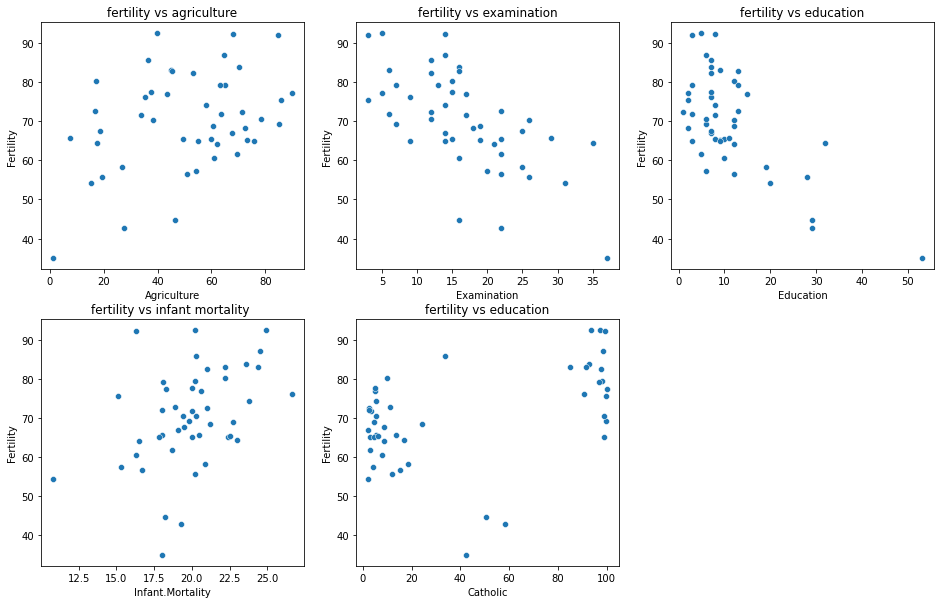

In [102]:
#create subplots with scatterplots to see if there are relations between varisbles and fertility level
plt.figure(figsize = (16, 10))

# fertility vs agricalture
plt.subplot(231)
plt.title('fertility vs agriculture')
sns.scatterplot(data = swiss, y = 'Fertility', x = 'Agriculture')

# fertility vs examination
plt.subplot(232)
plt.title('fertility vs examination')
sns.scatterplot(data = swiss, y = 'Fertility', x = 'Examination')

# fertility vs education
plt.subplot(233)
plt.title('fertility vs education')
sns.scatterplot(data = swiss, y = 'Fertility', x = 'Education')

# fertility vs infant mortality
plt.subplot(234)
plt.title('fertility vs infant mortality ')
sns.scatterplot(data = swiss, y = 'Fertility', x = 'Infant.Mortality')

# fertility vs education
plt.subplot(235)
plt.title('fertility vs education')
sns.scatterplot(data = swiss, y = 'Fertility', x = 'Catholic')

Based on the scatter plots there is a strong negative correlation between fertility and education, fertility and examination

In [98]:
pd.DataFrame(np.corrcoef(swiss.Fertility, swiss.Education), 
             index=['fertility', 'education'], columns=['fertility', 'education'])

,fertility,education
fertility,1.000000,-0.663789
education,-0.663789,1.000000


In [99]:
pd.DataFrame(np.corrcoef(swiss.Fertility, swiss.Examination), 
             index=['fertility', 'examination'], columns=['fertility', 'examination'])

,fertility,examination
fertility,1.000000,-0.645883
examination,-0.645883,1.000000


**4. Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.**

In [103]:
url_c = get_db_url('chipotle')

In [104]:
chipotle = pd.read_sql('SELECT * FROM orders', url_c)

In [108]:
# change the item price type to float
chipotle['item_price'] = chipotle.item_price.str.strip('$').str.replace(',', '').astype(float)

In [141]:
# create a column revenue that keeps a total revenue for all items
chipotle = chipotle.assign(revenue = chipotle.groupby('item_name').item_price.transform('sum'))

In [135]:
chipotle.head()

,id,order_id,quantity,item_name,choice_description,item_price,revenue
0,1,1,1,Chips and Fresh Tomato Salsa,nan,2.39,361.36
1,2,1,1,Izze,[Clementine],3.39,67.80
2,3,1,1,Nantucket Nectar,[Apple],3.39,98.31
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,2.39,78.87
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",16.98,7342.73


In [140]:
chipotle_stat = chipotle.groupby('item_name').sum().sort_values('quantity', ascending = False).head(4).reset_index()

In [142]:
chipotle_stat

,item_name,id,order_id,quantity,item_price,revenue
0,Chicken Bowl,1780635,713926,761,7342.73,5330821.98
1,Chicken Burrito,1238770,497303,591,5575.82,3083428.46
2,Chips and Guacamole,1122252,449959,506,2201.04,1054298.16
3,Steak Burrito,818163,328437,386,3851.43,1417326.24


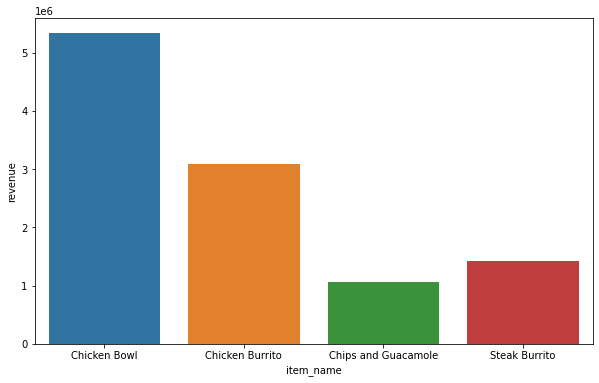

In [144]:
plt.figure(figsize = (10, 6))
sns.barplot(data = chipotle_stat, x = 'item_name', y = 'revenue');

**5. Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.**

In [145]:
sleep = data('sleepstudy')
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [147]:
sleep.Subject.nunique()

18